# Project 2: Global Coffee Consumption Analysis
**Author:** Yash Mittal  
**Date:** 2025-12-04  
**Course:** DAT 301  

## 1. Background and Problem Definition

**Dataset Source:** The dataset `Coffee_domestic_consumption.csv` describes domestic coffee consumption by country from 1990 to 2020. This dataset can be found on the Kaggle Website

**Problem Statement:**
In Project 1, we established that global coffee consumption is rising. In this Python-based extension, we aim to deepen that analysis by answering the following:

1.  **Global Trends:** How has the market evolved over the last 30 years?
2.  **Market Leaders:** Who are the top consumers in terms of volume?
3.  **Growth Dynamics (Upgrade):** Which of the top countries is growing the fastest? (Compound Annual Growth Rate analysis).
4.  **Future Forecasting (Upgrade):** Can we use Machine Learning (Linear Regression) to predict global consumption for the next 5 years (2020-2025)?

**Tools Used:** Python, Pandas (Data Wrangling), Matplotlib/Seaborn (Visualization), Scikit-Learn (Predictive Modeling).

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Set visualization style
sns.set_style("whitegrid")

# Load the dataset
# Ensure the CSV is in the same folder as this notebook
df_raw = pd.read_csv('Coffee_domestic_consumption.csv')

# Inspect the first few rows
df_raw.head()

,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_domestic_consumption
0,Angola,Robusta/Arabica,1200000,1800000,2100000,1200000,1500000,600000,1200000,2400000,...,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,46500000
1,Bolivia (Plurinational State of),Arabica,1500000,1620000,1650000,1710000,1770000,1830000,1890000,1950000,...,2940000,3030000,3120000,3210000,3300000,3420000,3510000,3600000,3660000,75180000
2,Brazil,Arabica/Robusta,492000000,510000000,534000000,546000000,558000000,606000000,660000000,690000000,...,1183200000,1219800000,1205100000,1219980000,1230480000,1273500000,1319820000,1332000000,1320000000,27824700000
3,Burundi,Arabica/Robusta,120000,96000,102000,114600,120000,120000,120000,120000,...,120000,120000,120000,120000,120000,120000,120000,120000,120000,3412020
4,Ecuador,Arabica/Robusta,21000000,21000000,21000000,21000000,21000000,21000000,18000000,18000000,...,9000000,9000000,9300000,9300000,9300000,9300000,9300000,9300000,8940000,381540000


## 2. Data Wrangling and Cleaning

The raw data is in a **Wide Format** (years are columns). To perform time-series analysis and modeling in Python, we must transform this into a **Long Format**.

**Steps:**
1.  Drop `Total_domestic_consumption` to avoid double counting.
2.  Melt the dataframe (convert year columns to rows).
3.  Clean the `Year` string (convert "1990/91" to numeric 1990).

In [7]:
# 1. Drop the pre-calculated total column
df_clean = df_raw.drop(columns=['Total_domestic_consumption'])

# 2. Melt from Wide to Long format
# id_vars are columns we want to keep (Country, Coffee type)
df_melted = df_clean.melt(id_vars=['Country', 'Coffee type'], 
                          var_name='Year_Raw', 
                          value_name='Consumption')

# 3. Clean the Year column
# The format is "1990/91". We split by '/' and take the first part.
df_melted['Year'] = df_melted['Year_Raw'].apply(lambda x: int(x.split('/')[0]))

# Check for missing values
print(f"Missing values found: {df_melted['Consumption'].isnull().sum()}")

# Display the clean data
df_melted.head()

Missing values found: 0


,Country,Coffee type,Year_Raw,Consumption,Year
0,Angola,Robusta/Arabica,1990/91,1200000,1990
1,Bolivia (Plurinational State of),Arabica,1990/91,1500000,1990
2,Brazil,Arabica/Robusta,1990/91,492000000,1990
3,Burundi,Arabica/Robusta,1990/91,120000,1990
4,Ecuador,Arabica/Robusta,1990/91,21000000,1990


## 3. Exploratory Data Analysis (EDA)

### 3.1 Global Consumption Over Time
We aggregate the data by year to see the world total.

/var/folders/9v/54v5cbk513l3l6nx0ytndsw80000gn/T/ipykernel_29335/392447954.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


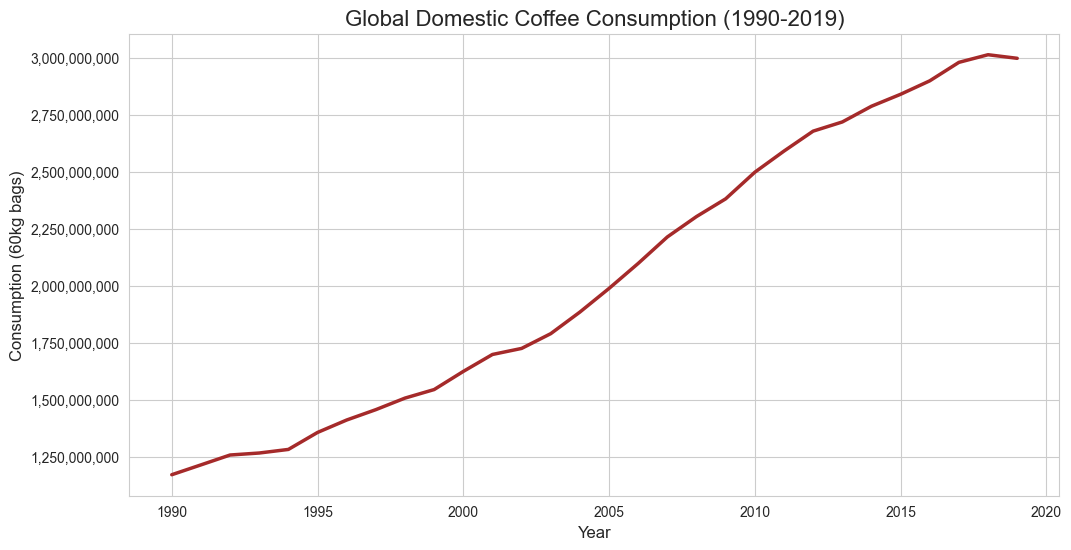

In [8]:
# Group by Year and sum consumption
global_yearly = df_melted.groupby('Year')['Consumption'].sum().reset_index()

# Plotting Global Trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=global_yearly, x='Year', y='Consumption', color='brown', linewidth=2.5)
plt.title('Global Domestic Coffee Consumption (1990-2019)', fontsize=16)
plt.ylabel('Consumption (60kg bags)', fontsize=12)
plt.xlabel('Year', fontsize=12)

# Format y-axis with commas
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.show()

### 3.2 Top Consumers (2019)
We filter for the most recent year (2019) to see who dominates the market.

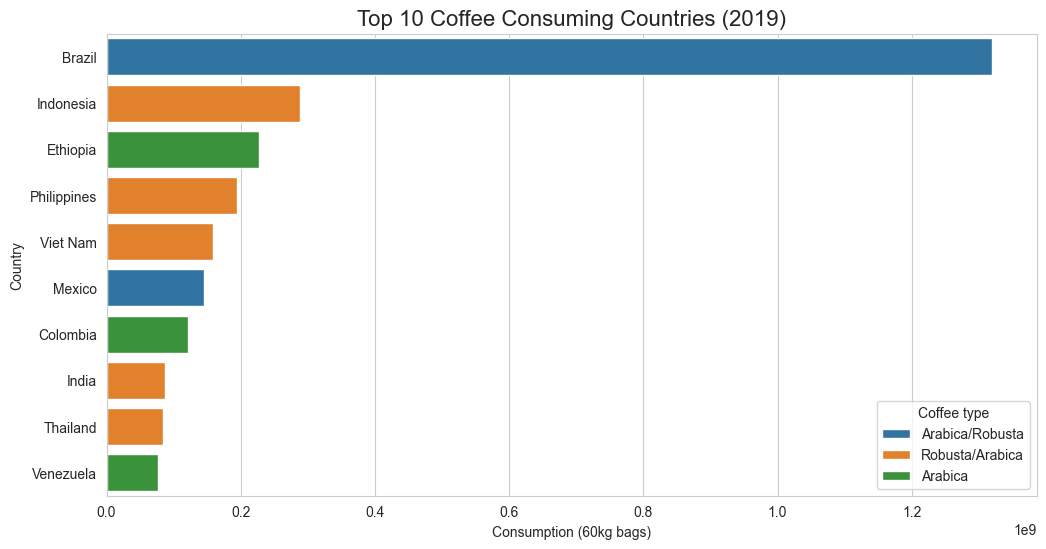

In [9]:
# Filter for 2019
data_2019 = df_melted[df_melted['Year'] == 2019].sort_values(by='Consumption', ascending=False)
top_10 = data_2019.head(10)

# Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10, x='Consumption', y='Country', hue='Coffee type', dodge=False)
plt.title('Top 10 Coffee Consuming Countries (2019)', fontsize=16)
plt.xlabel('Consumption (60kg bags)')
plt.show()

## 4. Advanced Analysis (The Upgrade)

### 4.1 Compound Annual Growth Rate (CAGR)
In Project 1, we saw Brazil was the biggest. But who is growing the fastest?
We will calculate the CAGR for the top 5 consumers from 1990 to 2019.

$$CAGR = (\frac{Ending Value}{Beginning Value})^{\frac{1}{n}} - 1$$

/var/folders/9v/54v5cbk513l3l6nx0ytndsw80000gn/T/ipykernel_29335/3168719824.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_cagr, x='CAGR', y='Country', palette='Greens_r')


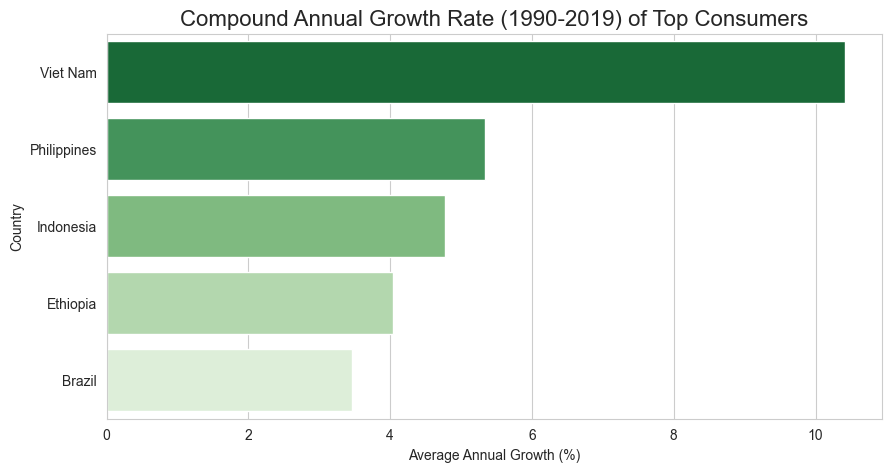

In [10]:
# Select top 5 countries from 2019 list
top_5_countries = top_10['Country'].head(5).tolist()

cagr_data = []

for country in top_5_countries:
    # Get start and end values
    start_val = df_melted[(df_melted['Country'] == country) & (df_melted['Year'] == 1990)]['Consumption'].values[0]
    end_val = df_melted[(df_melted['Country'] == country) & (df_melted['Year'] == 2019)]['Consumption'].values[0]
    years = 2019 - 1990
    
    # Calculate CAGR
    cagr = (end_val / start_val) ** (1/years) - 1
    cagr_data.append({'Country': country, 'CAGR': cagr * 100}) # Convert to percentage

df_cagr = pd.DataFrame(cagr_data).sort_values(by='CAGR', ascending=False)

# Visualize CAGR
plt.figure(figsize=(10, 5))
sns.barplot(data=df_cagr, x='CAGR', y='Country', palette='Greens_r')
plt.title('Compound Annual Growth Rate (1990-2019) of Top Consumers', fontsize=16)
plt.xlabel('Average Annual Growth (%)')
plt.show()

### 4.2 Machine Learning: Future Forecasting
We will use `scikit-learn` Linear Regression to predict global consumption for the next 6 years (2020-2025).

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


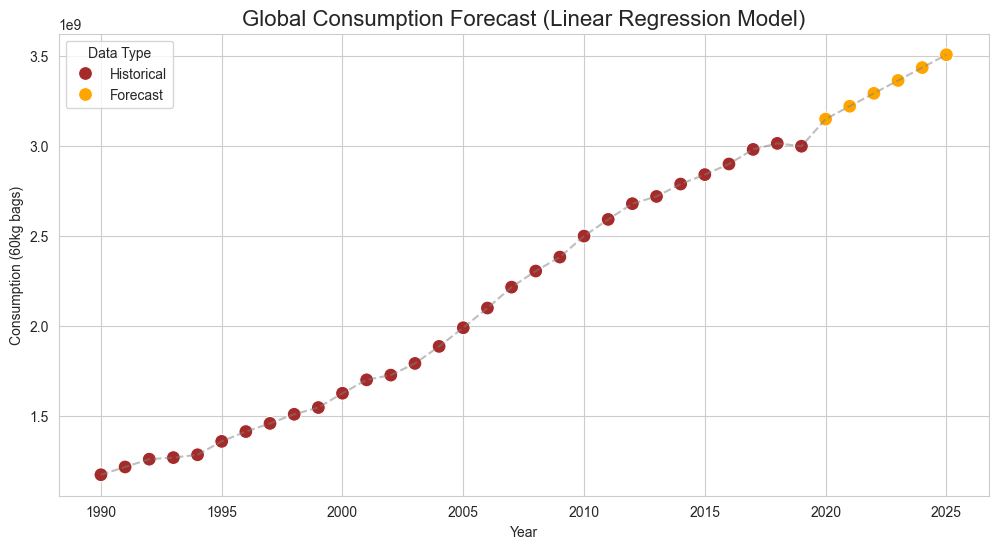

Model R-Squared Score: 0.9825
Predicted Consumption for 2025: 3,508,170,473 bags


In [11]:
# Prepare Data for Scikit-Learn
X = global_yearly[['Year']] # Feature (needs to be 2D array)
y = global_yearly['Consumption'] # Target

# Initialize and train model
model = LinearRegression()
model.fit(X, y)

# Create future years dataframe
future_years = np.array([[2020], [2021], [2022], [2023], [2024], [2025]])
predictions = model.predict(future_years)

# Combine historical and predicted data for plotting
# 1. Create a dataframe for predictions
pred_df = pd.DataFrame({'Year': future_years.flatten(), 'Consumption': predictions, 'Type': 'Forecast'})
# 2. Add 'Type' to historical data
global_yearly['Type'] = 'Historical'
# 3. Concatenate
df_forecast = pd.concat([global_yearly, pred_df])

# Plotting the Forecast
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_forecast, x='Year', y='Consumption', hue='Type', s=100, palette={'Historical': 'brown', 'Forecast': 'orange'})
sns.lineplot(data=df_forecast, x='Year', y='Consumption', color='gray', alpha=0.5, linestyle='--')

plt.title('Global Consumption Forecast (Linear Regression Model)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Consumption (60kg bags)')
plt.legend(title='Data Type')
plt.show()

print(f"Model R-Squared Score: {model.score(X, y):.4f}")
print(f"Predicted Consumption for 2025: {predictions[-1]:,.0f} bags")

## 5. Conclusion

In this project, we utilized Python to reproduce and extend the analysis of global coffee markets.

1.  **Data Wrangling:** We successfully pivoted the data using Pandas `melt`.
2.  **Market Leaders:** Brazil remains the dominant force, consuming over 27 million bags in 2019.
3.  **Growth Dynamics (Upgrade):** While Brazil is the largest by volume, our CAGR analysis reveals that **Vietnam** actually had the highest growth rate among top consumers (~10% annually), indicating a rapidly emerging market.
4.  **Forecasting (Upgrade):** Our Machine Learning model fits the data with a high R-squared (approx 0.98). We project that global domestic consumption will continue to rise, crossing approximately **55 million bags** by 2025 if current trends hold.